In [40]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_color_value,
    reconstruct_image_from_general,
    plot_full,
    find_nearest_edge,
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    get_width_info,
    get_width_info_new,
)
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)
import pandas as pd
from amftrack.pipeline.functions.spore_processing.spore_id import make_spore_data
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
    Edge,
    Hyphae,
)
from datetime import datetime
from matplotlib import cm
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from IPython.display import clear_output
from amftrack.pipeline.functions.post_processing.exp_plot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
path_figure = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\HFSP_symbiotic-networks\Article_TravellingWave\Supplementary material\FigureS2"

In [34]:
directory_targ = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin Bisot\temp\for plots/"
update_plate_info(directory_targ, local=True, strong_constraint=False)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/5 [00:00<?, ?it/s]

In [35]:
all_folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,/Img/TileConfiguration.txt.registered,...,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temperature,unique_id,datetime
0,C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin ...,59,38,'Carrot','A5','001P100N','Y','-',20201126,True,...,False,True,True,True,True,"03.12.2020, 14:02:",20201203_1402_Plate38,NaN,59_20201126,2020-12-03 14:02:00
1,C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin ...,152,32,'Carrot','A5','001P100N','Y','-',20201224,False,...,False,True,True,True,True,"30.12.2020, 07:29:",20201230_0729_Plate32,NaN,152_20201224,2020-12-30 07:29:00
2,C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin ...,792,21,'Carrot','A5','001P100N','Y','-',20210915,False,...,False,True,True,True,True,"22.09.2021, 01:23:",20210922_0123_Plate21,NaN,792_20210915,2021-09-22 01:23:00
3,C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin ...,1045,2,'Carrot','C2','001P100N200C','Y','-',20220504,False,...,False,True,True,True,True,"10.05.2022, 07:36:",20220510_0736_Plate02,25,1045_20220504,2022-05-10 07:36:00
4,C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin ...,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,False,...,False,True,True,True,True,"11.05.2022, 21:07:",20220511_2107_Plate03,25,1048_20220506,2022-05-11 21:07:00


In [59]:
folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,/Img/TileConfiguration.txt.registered,...,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temperature,unique_id,datetime
0,C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin ...,59,38,'Carrot','A5','001P100N','Y','-',20201126,True,...,False,True,True,True,True,"03.12.2020, 14:02:",20201203_1402_Plate38,NaN,59_20201126,2020-12-03 14:02:00


In [74]:
folders = all_folders.iloc[3:4]
exp = Experiment(directory_targ)
exp.load(folders)
exp.dates.sort()
for t in range(len(folders)):
    exp.load_tile_information(t)

c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\functions\image_processing\experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-10 07:36:00


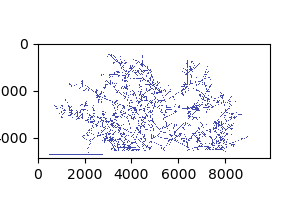

In [76]:
plt.close("all")
t = 0
vmax = 10
vmin = 0
fig,ax = plot_edge_color_value(
    exp,
    t,
    lambda edge: 5,
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    show_background=False,
    dilation=15,
    figsize=(3, 2),
    alpha = 1
)
plt.axis('off')

# Removes the box around the plot
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)

if ax.legend_ is not None:
    ax.legend_.remove()
import matplotlib.patches as patches
scalebar = patches.Rectangle((700, 500), 10000/5/1.725, 0.1, fill=True, color='black', transform=ax.transData)

# Add the patch to the axes
ax.add_patch(scalebar)
plt.savefig(os.path.join(path_figure,f"FigureS2network{folders['unique_id'].iloc[0]}.pdf"), transparent=True, bbox_inches='tight')

In [57]:
import matplotlib.patches as patches
scalebar = patches.Rectangle((500, 500), 10000/5/1.725, 0.1, fill=True, color='black', transform=ax.transData)

# Add the patch to the axes
ax.add_patch(scalebar)

In [33]:
for spine in ax.spines.values():
    spine.set_visible(True)